DESCRIPTION:

To give credit where credit is due: This problem was taken from the ACMICPC-Northwest Regional Programming Contest. Thank you problem writers.

You are helping an archaeologist decipher some runes. He knows that this ancient society used a Base 10 system, and that they never start a number with a leading zero. He's figured out most of the digits as well as a few operators, but he needs your help to figure out the rest.

The professor will give you a simple math expression, of the form

[number][op][number]=[number]

He has converted all of the runes he knows into digits. The only operators he knows are addition (+),subtraction(-), and multiplication (*), so those are the only ones that will appear. Each number will be in the range from -1000000 to 1000000, and will consist of only the digits 0-9, possibly a leading -, and maybe a few ?s. If there are ?s in an expression, they represent a digit rune that the professor doesn't know (never an operator, and never a leading -). All of the ?s in an expression will represent the same digit (0-9), and it won't be one of the other given digits in the expression. No number will begin with a 0 unless the number itself is 0, therefore 00 would not be a valid number.

Given an expression, figure out the value of the rune represented by the question mark. If more than one digit works, give the lowest one. If no digit works, well, that's bad news for the professor - it means that he's got some of his runes wrong. output -1 in that case.

Complete the method to solve the expression to find the value of the unknown rune. The method takes a string as a paramater repressenting the expression and will return an int value representing the unknown rune or -1 if no such rune exists.

З цим завданням чат GPT не справився

Оскільки це завдання потребує чіткого опису, то чат GPT одразу отримав повну умову (без прикладів і вступу)

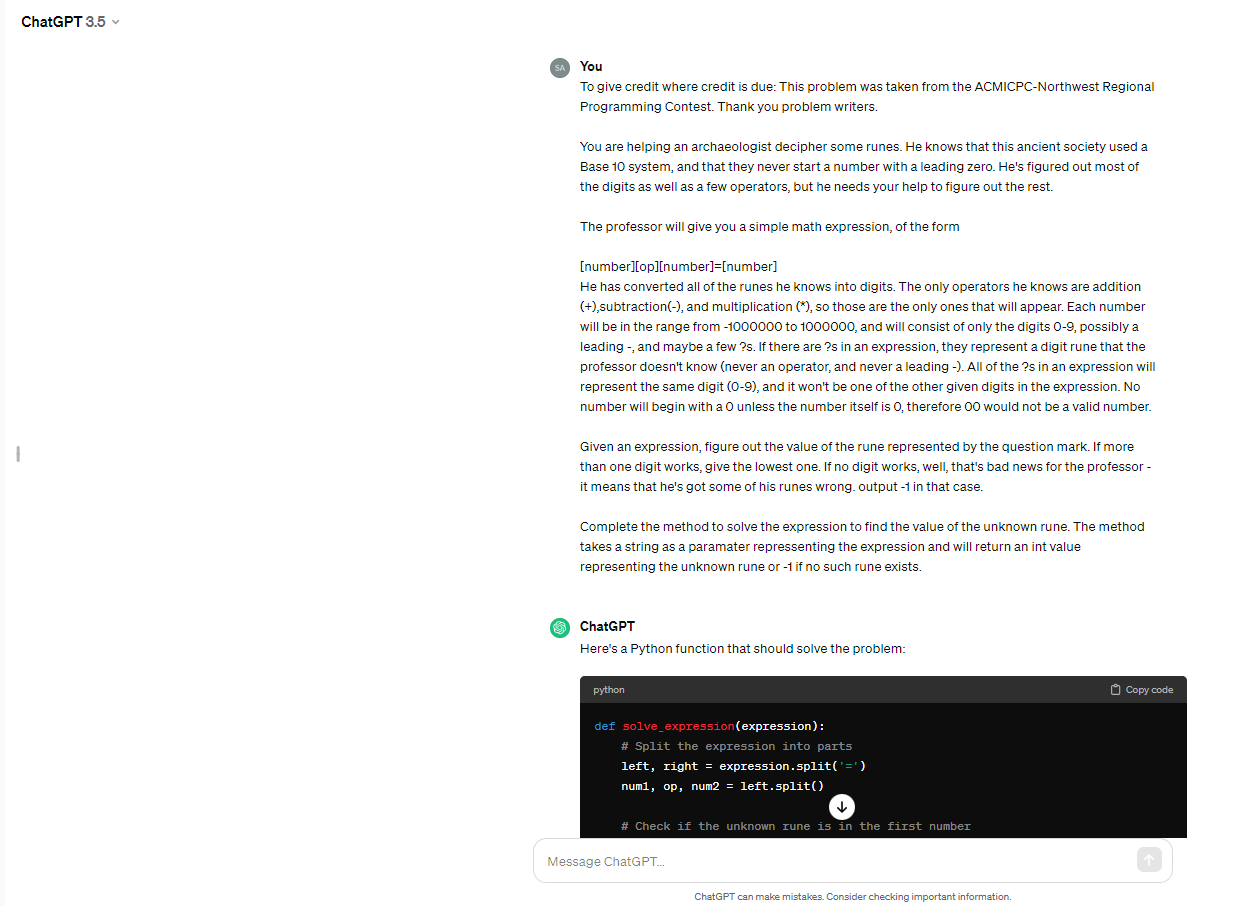

В нього виникли проблеми зі split

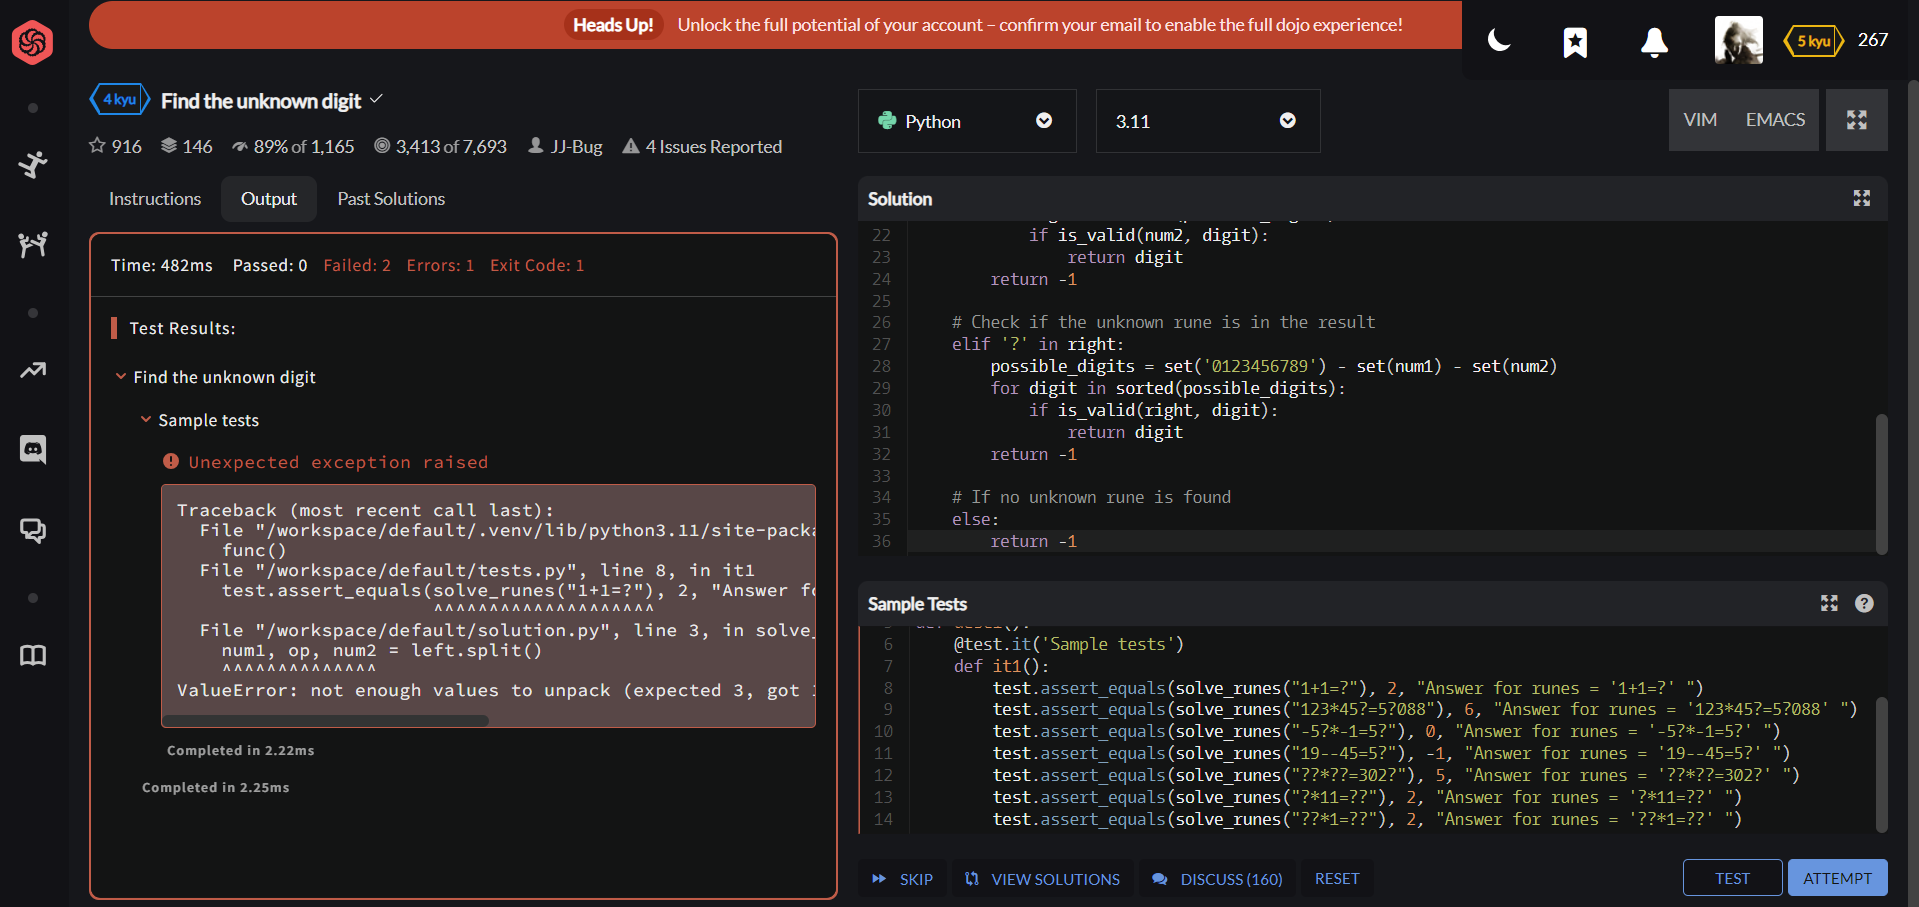

Я вказала йому на помилку, тоді він запропонував мені інший варіант. Помилок не було, але не всі тести проходили.

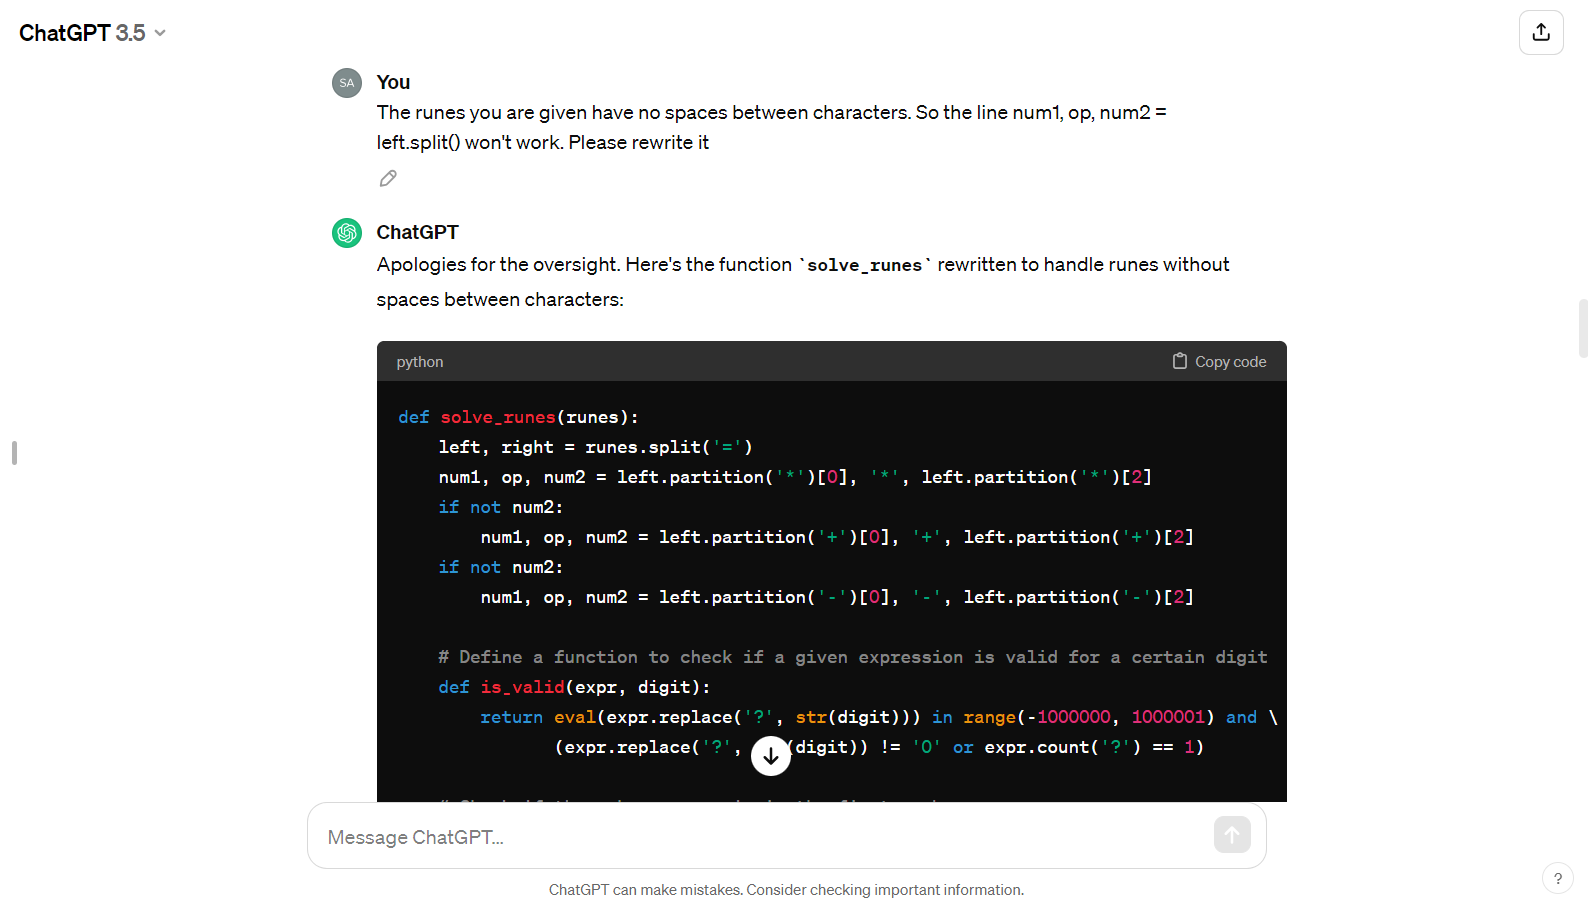

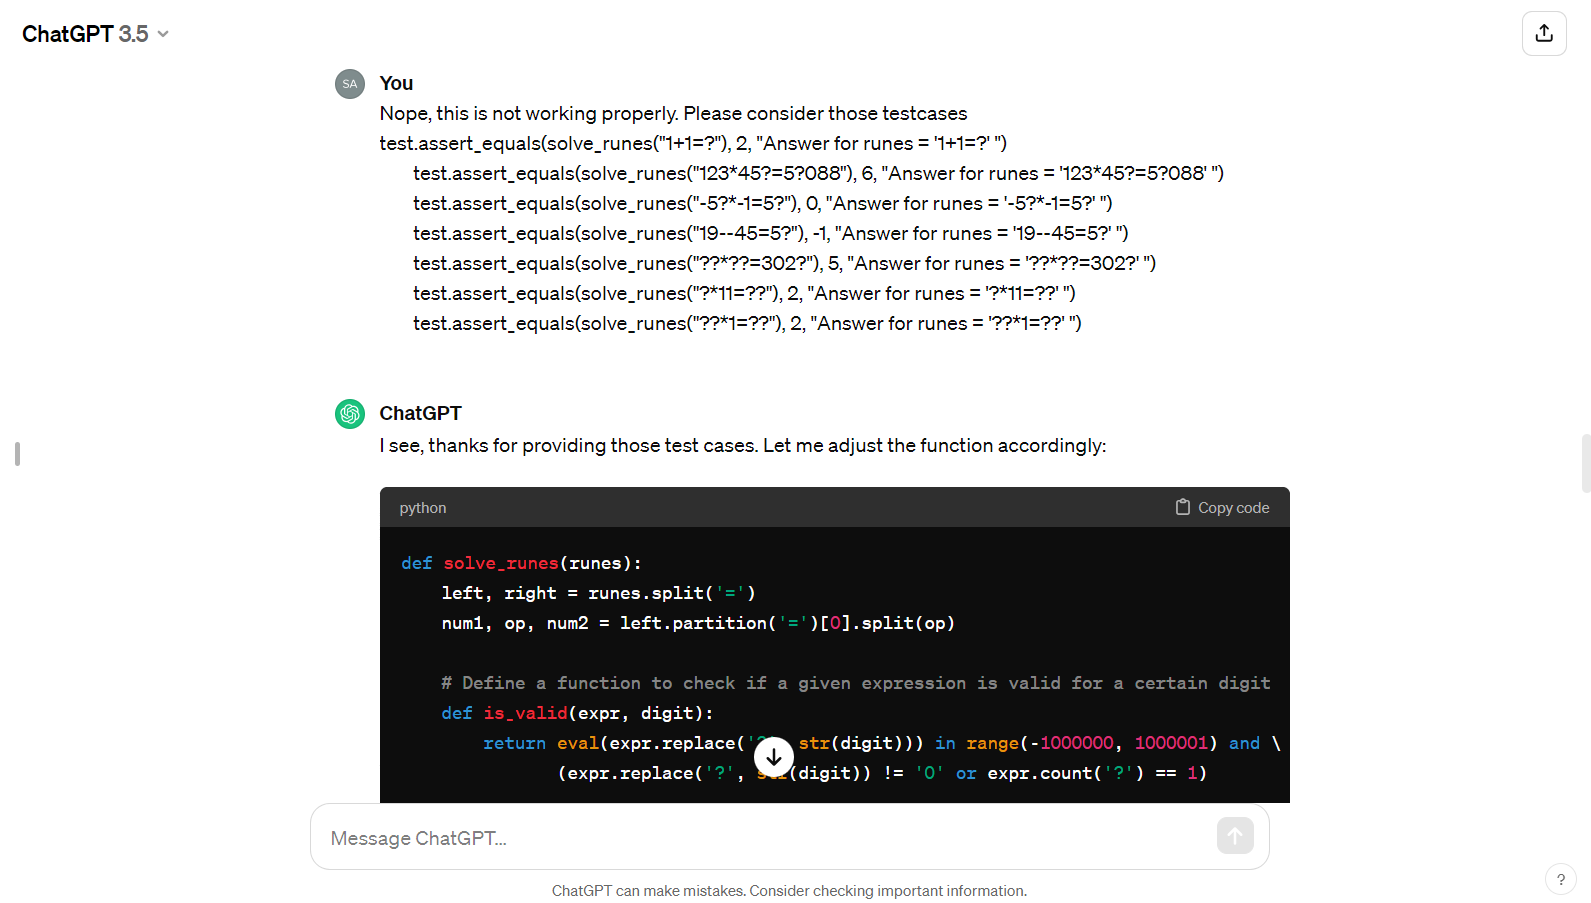

Я вказала на те, які тести не проходять, тоді з'явилася ще одна помилка. Після виправлення однієї помилки з'являлася інша. Після ще спроб виправити його я вирішила почати новий чат і повінстю дати йому умову з усфма прикладами.

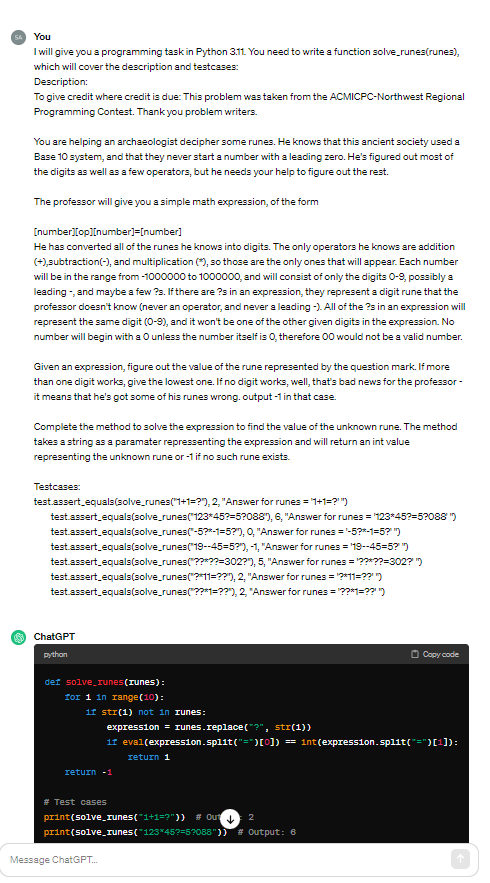

Це спрацювало, бо його рішення тепер не видавало помилок і винятків. Проте все ще не всі тести проходили.

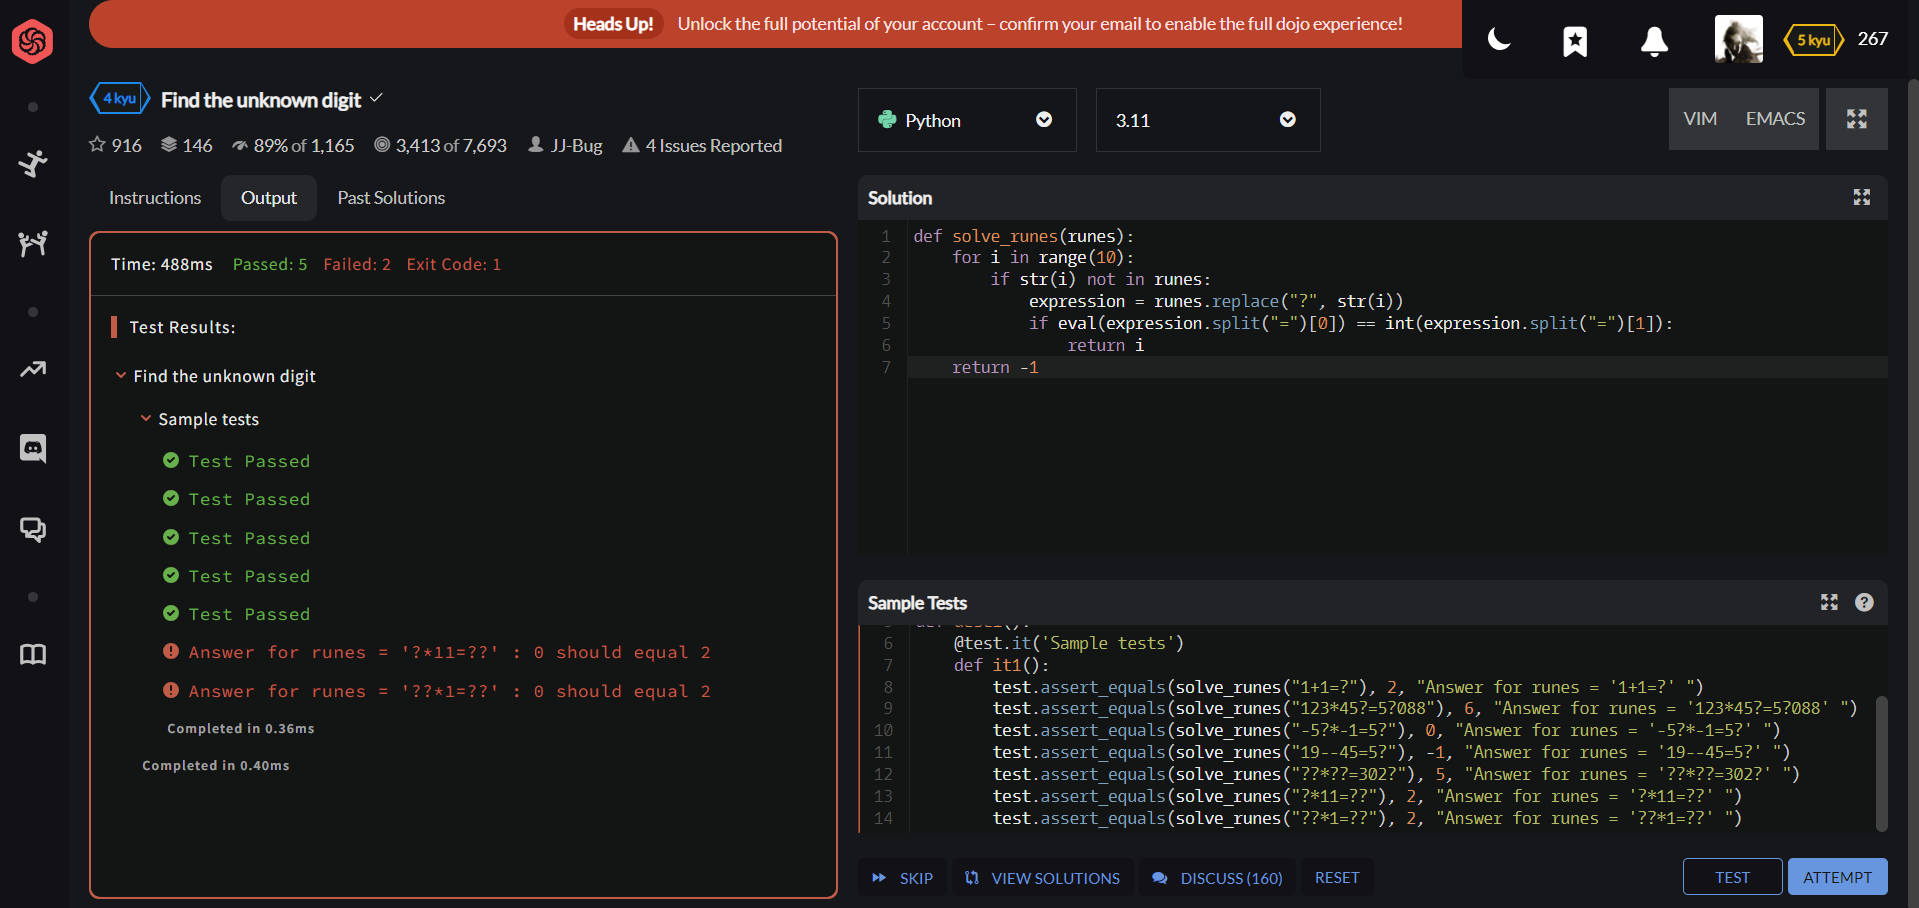

Після того, як я вказала йому на помилки, ці тести пройшли, але перестав працювати інший

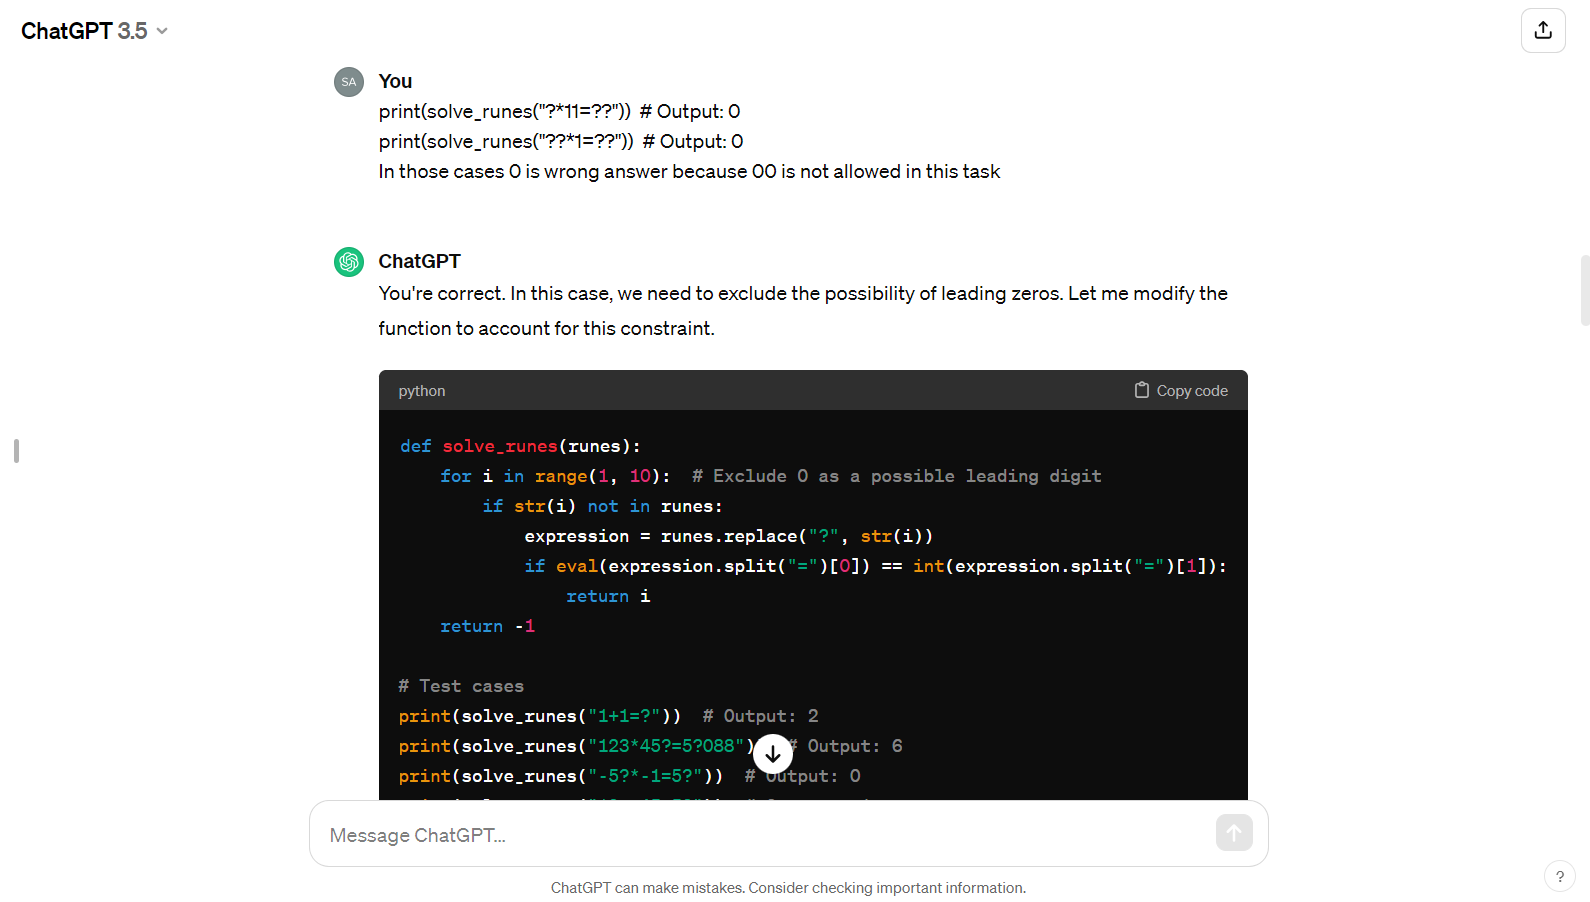

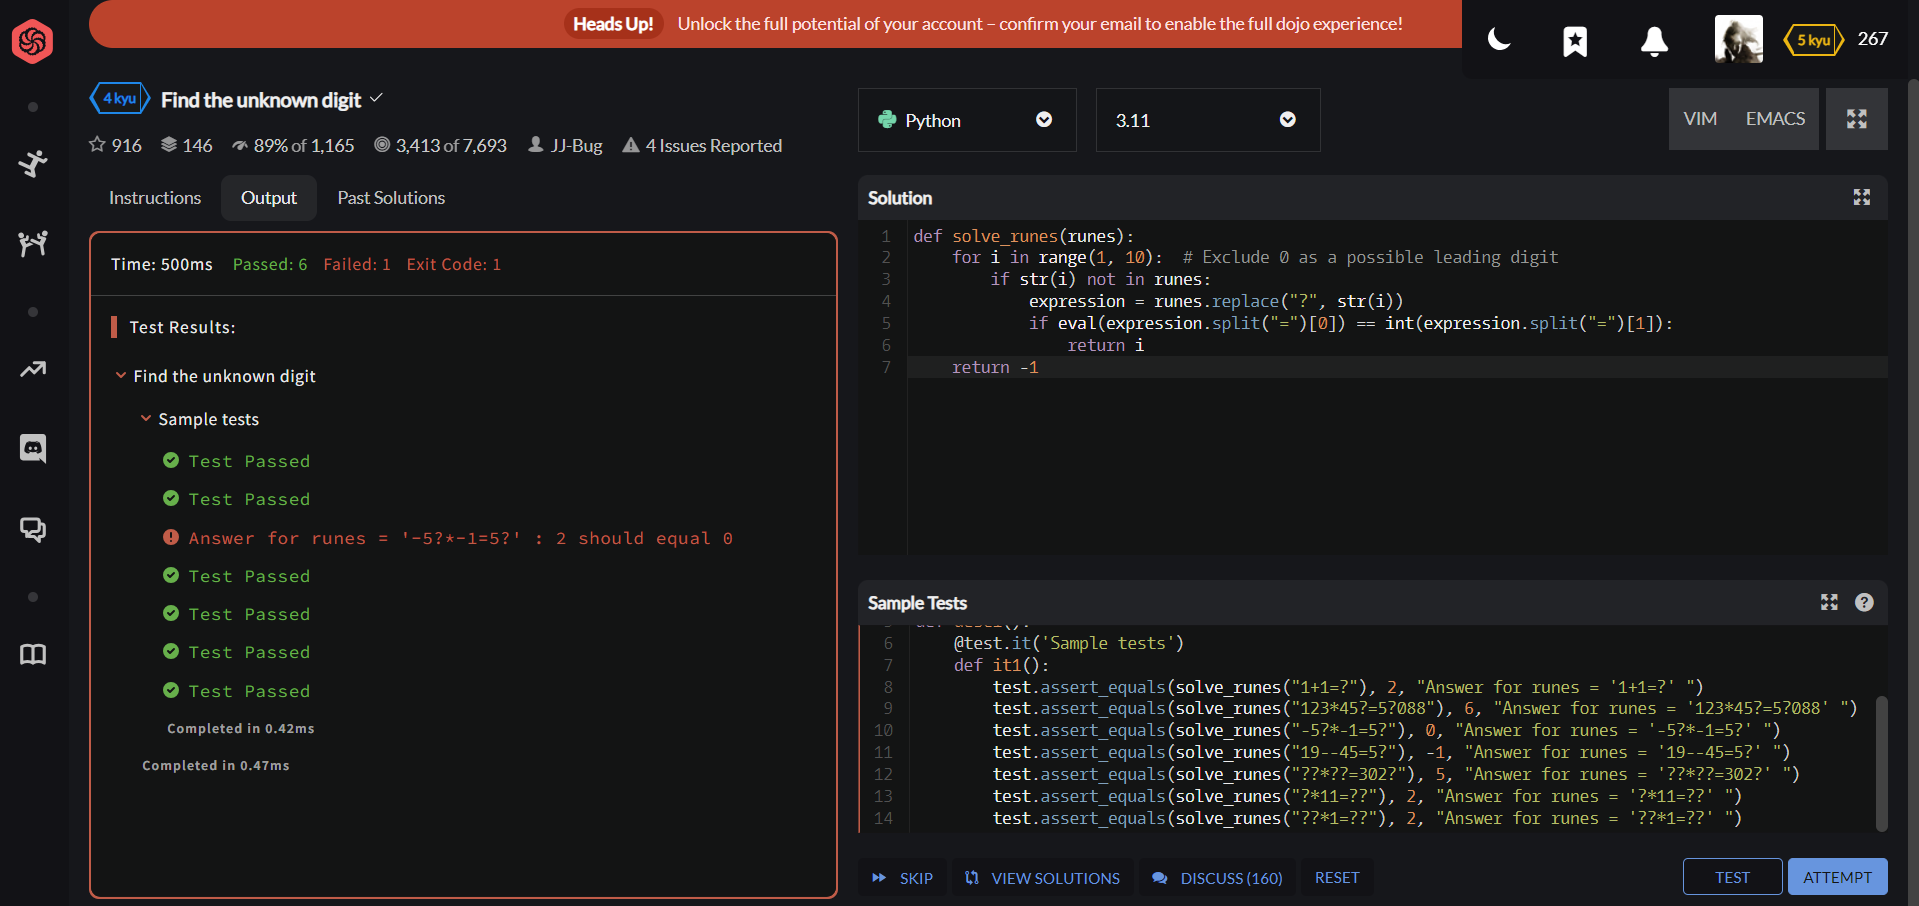

І далі після ще спроб виправити код він видава по черзі одні і ті самі рішення

Його остання (найкраща) версія

In [ ]:
def solve_runes(runes):
    for i in range(10):
        if str(i) not in runes:
            expression = runes.replace("?", str(i))
            left, right = expression.split("=")
            if eval(left) == int(right):
                if (left.startswith('-') or right.startswith('-')) and str(i) != '0':
                    continue
                if (left[0] == '?' or left[0] == '-') and i == 0:
                    continue
                if left[0] == right[0] == '0':
                    continue
                if left[0] == '-' and i == 0:
                    continue
                return i
    return -1

# Test cases
print(solve_runes("1+1=?"))  # Output: 2
print(solve_runes("123*45?=5?088"))  # Output: 6
print(solve_runes("-5?*-1=5?"))  # Output: 0
print(solve_runes("19--45=5?"))  # Output: -1
print(solve_runes("??*??=302?"))  # Output: 5
print(solve_runes("?*11=??"))  # Output: 2
print(solve_runes("??*1=??"))  # Output: 2


Наше рішення (проходить всі тести)

In [ ]:
def solve_runes(expression):
    left, right = expression.split('=')
    number = -1
    for i in range(10):
        try:
            if eval(left.replace('?', str(i))) == int(right.replace('?', str(i))):
                # replaced = expression.replace('?', str(i))
                if str(i) not in expression and i!=0:
                    number = i
                if i == 0:
                    replaced = expression.replace('?', str(i))
                    for j, el in enumerate(replaced):
                        if j != 0 and el == '0' and replaced[j-1] != '0':
                            if j != len(replaced) - 1 and replaced[j-1] not in ['0', '-', '+', '=', '*']:
                                if str(i) not in expression:
                                    number = i
            if number != -1:
                return number
        except SyntaxError:
            continue
    return number


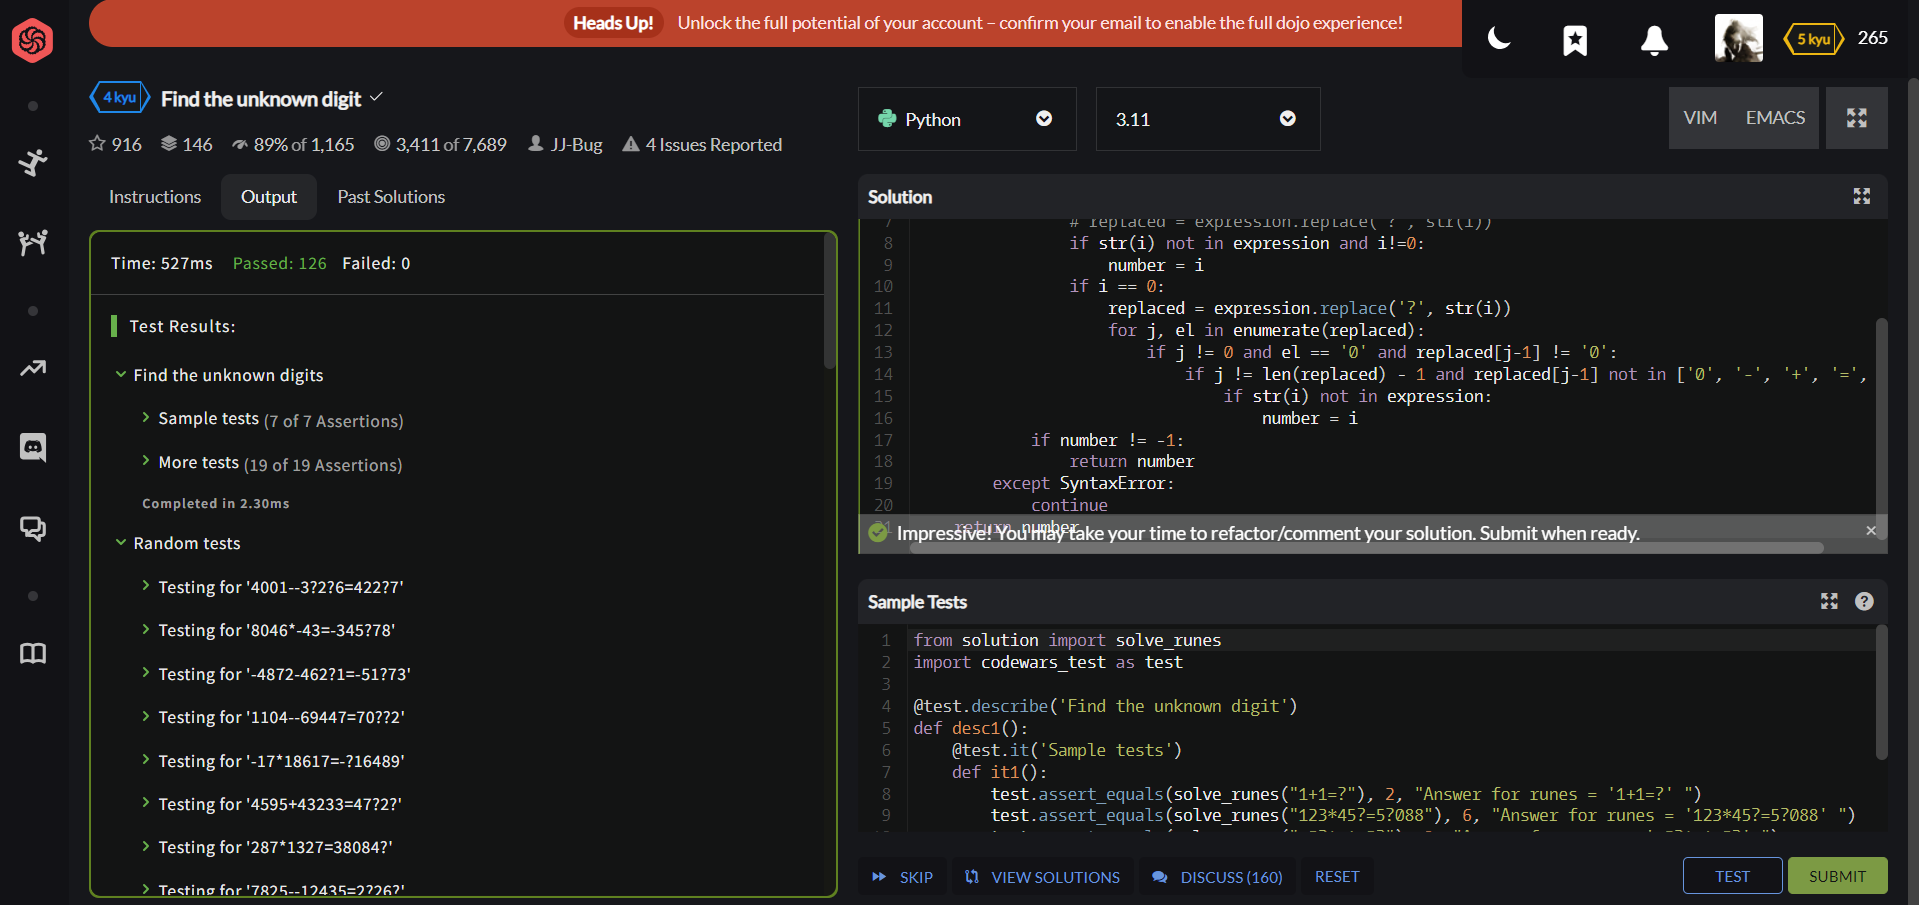